In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

from geopandas import GeoDataFrame
from imblearn.over_sampling import SMOTE
from shapely.wkb import loads
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [23]:
df = pd.read_csv('../../data/finland/new_sample_plots_uerra_cdf_features.csv')

In [24]:
df.head()

,sampleplotid,clusterid,sampleplottype,measurementdate,center_x,center_y,center_z,mean_age_years,mean_dbh_cm,mean_height_m,...,uerra_consecutive_dry_days_index_per_time_period,uerra_number_of_cdd_periods_with_more_than_5days_per_time_period,uerra_consecutive_wet_days_index_per_time_period,uerra_number_of_cwd_periods_with_more_than_5days_per_time_period,uerra_precipitation_days_index_per_time_period,uerra_wet_days_index_per_time_period,uerra_highest_one_day_precipitation_amount_per_time_period,uerra_highest_five_day_precipitation_amount_per_time_period,uerra_number_of_5day_heavy_precipitation_periods_per_time_period,uerra_simple_daily_intensity_index_per_time_period
0,639971,48070005,1,2017-08-14,393888.00,7401168.00,0.00,39,9.20,9.10,...,29.0,209.0,15.0,36.0,1892.0,1892.0,33.170521,33.170521,0.0,5.050500
1,718519,47110091,1,2018-07-18,576046.89,7395714.46,346.79,66,16.41,9.95,...,24.0,166.0,14.0,43.0,2025.0,2025.0,49.622128,49.622128,0.0,4.469509
2,104636,40110069,1,2011-09-26,573195.59,7037602.47,197.03,72,23.75,17.73,...,20.0,196.0,13.0,56.0,2074.0,2074.0,53.007542,53.007542,1.0,5.247389
3,265558,43116119,1,2013-08-29,594209.26,7181267.18,255.95,42,17.99,14.19,...,25.0,174.0,12.0,58.0,2158.0,2158.0,43.480469,43.480469,0.0,5.019283
4,696784,39100744,1,2018-08-13,546924.17,6997684.98,124.56,14,6.95,7.19,...,47.0,214.0,13.0,32.0,1844.0,1844.0,60.879169,60.879169,1.0,5.115222


In [25]:
df.columns

Index(['sampleplotid', 'clusterid', 'sampleplottype', 'measurementdate',
       'center_x', 'center_y', 'center_z', 'mean_age_years', 'mean_dbh_cm',
       'mean_height_m', 'main_species_en', 'total_m3_ha', 'pine_m3_ha',
       'spruce_m3_ha', 'birch_m3_ha', 'other_bl_m3_ha', 'pine_percent',
       'spruce_percent', 'birch_percent', 'other_bl_percent',
       'is_timber_defined', 'total_timber_m3_ha', 'pine_timber_m3_ha',
       'spruce_timber_m3_ha', 'birch_timber_m3_ha', 'other_bl_timber_m3_ha',
       'total_stems_ha', 'pine_stems_ha', 'spruce_stems_ha', 'birch_stems_ha',
       'other_bl_stems_ha', 'total_m2_ha', 'pine_m2_ha', 'spruce_m2_ha',
       'birch_m2_ha', 'other_bl_m2_ha', 'geometry',
       'uerra_consecutive_frost_days_index_per_time_period',
       'uerra_number_of_cfd_periods_with_more_than_5days_per_time_period',
       'uerra_frost_days_index_per_time_period',
       'uerra_consecutive_summer_days_index_per_time_period',
       'uerra_number_of_csu_periods_with_more_

# Pine Classifier

In [26]:
df['target'] = np.where(df['pine_percent'] > 0.5, 1, 0)

In [27]:
columns = [c for c in df.columns if 'uerra' in c]

In [28]:
X = df[columns]

In [29]:
y_pine = df['target']

In [30]:
X_pine_resampled, y_pine_resampled = SMOTE().fit_resample(X, y_pine)

In [31]:
X_pine_train, X_pine_test, y_pine_train, y_pine_test = train_test_split(X_pine_resampled, y_pine_resampled, train_size=0.7)

In [32]:
pine_parameters = {'n_estimators': [100], 'max_depth': [10, 25, 50]}

In [33]:
clf_pine = GridSearchCV(RandomForestClassifier(), cv=3, param_grid=pine_parameters, verbose=9)

In [34]:
clf_pine.fit(X_pine_train, y_pine_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... max_depth=10, n_estimators=100, score=0.721, total=   6.1s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.720, total=   6.1s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.2s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.714, total=   6.1s
[CV] max_depth=25, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   18.3s remaining:    0.0s


[CV] ...... max_depth=25, n_estimators=100, score=0.772, total=   9.4s
[CV] max_depth=25, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   27.7s remaining:    0.0s


[CV] ...... max_depth=25, n_estimators=100, score=0.769, total=   9.4s
[CV] max_depth=25, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   37.1s remaining:    0.0s


[CV] ...... max_depth=25, n_estimators=100, score=0.769, total=   9.4s
[CV] max_depth=50, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   46.5s remaining:    0.0s


[CV] ...... max_depth=50, n_estimators=100, score=0.772, total=   9.7s
[CV] max_depth=50, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   56.2s remaining:    0.0s


[CV] ...... max_depth=50, n_estimators=100, score=0.770, total=   9.7s
[CV] max_depth=50, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.1min remaining:    0.0s


[CV] ...... max_depth=50, n_estimators=100, score=0.768, total=   9.4s


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [35]:
y_pine_pred = clf_pine.predict(X_pine_test)

In [16]:
accuracy_score(y_pine_pred, y_pine_test)

0.7852208721527507

In [36]:
precision_score(y_pine_pred, y_pine_test)

0.7564546933578553

In [37]:
recall_score(y_pine_pred, y_pine_test)

0.8014689350221089

In [38]:
cm = confusion_matrix(y_pine_pred, y_pine_test)
cm

array([[11443,  3443],
       [ 2649, 10694]])

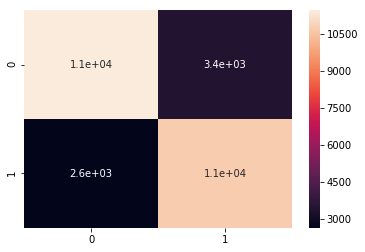

In [39]:
sn.heatmap(cm, annot=True)

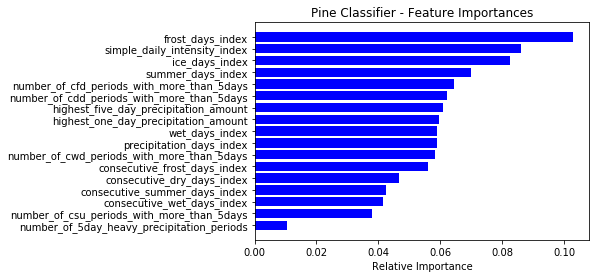

In [56]:
features = [c[6:-16] for c in X.columns]
importances = clf_pine.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.title('Pine Classifier - Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Spruce

In [41]:
df['target'] = np.where(df['spruce_percent'] > 0.5, 1, 0)

In [42]:
y_spruce = df['target']

In [43]:
X_spruce_resampled, y_spruce_resampled = SMOTE().fit_resample(X, y_spruce)

In [44]:
X_spruce_train, X_spruce_test, y_spruce_train, y_spruce_test = train_test_split(X_spruce_resampled, y_spruce_resampled, train_size=0.7)

In [45]:
spruce_parameters = {'n_estimators': [100], 'max_depth': [100]}

In [46]:
clf_spruce = GridSearchCV(RandomForestClassifier(), param_grid=spruce_parameters, cv=3, verbose=9)

In [47]:
clf_spruce.fit(X_spruce_train, y_spruce_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] max_depth=100, n_estimators=100 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... max_depth=100, n_estimators=100, score=0.726, total=   8.9s
[CV] max_depth=100, n_estimators=100 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.9s remaining:    0.0s


[CV] ..... max_depth=100, n_estimators=100, score=0.729, total=   9.1s
[CV] max_depth=100, n_estimators=100 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   18.0s remaining:    0.0s


[CV] ..... max_depth=100, n_estimators=100, score=0.730, total=   8.8s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   26.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   26.8s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [48]:
clf_spruce.best_params_

{'max_depth': 100, 'n_estimators': 100}

In [49]:
y_spruce_pred = clf_spruce.predict(X_spruce_test)

In [50]:
accuracy_score(y_spruce_pred, y_spruce_test)

0.7417403443462075

In [51]:
precision_score(y_spruce_pred, y_spruce_test)

0.7575781189121795

In [52]:
recall_score(y_spruce_pred, y_spruce_test)

0.7325747871298319

In [53]:
cm = confusion_matrix(y_spruce_pred, y_spruce_test)
cm

array([[9406, 3111],
       [3549, 9722]])

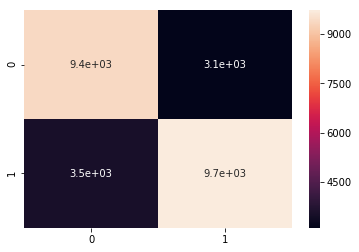

In [54]:
sn.heatmap(cm, annot=True)

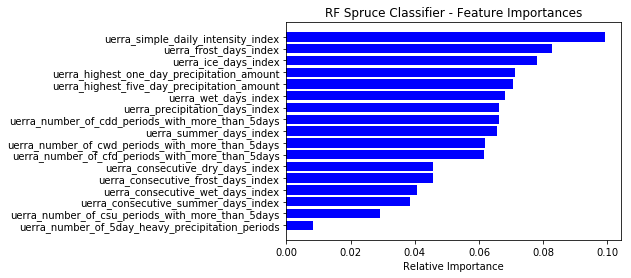

In [55]:
features = [c[0:-16] for c in X.columns]
importances = clf_spruce.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.title('RF Spruce Classifier - Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()